In [94]:
from sklearn import datasets
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [10]:
# Data pre-processing
data_test = pd.read_csv('C:/Users/Abby/Downloads/hw1_18_test.dat.txt',sep=" ",header=None)
data_train = pd.read_csv('C:/Users/Abby/Downloads/hw1_18_train.dat.txt',sep=" ",header=None)

data_test.columns = ['x1','x2','x3','x4','y']
data_train.columns = ['x1','x2','x3','x4','y']

In [20]:
# Add intercept
data_test['x0'] = 1
data_train['x0'] = 1

In [51]:
def sign(a):
    if a > 0:
        return 1
    else:
        return -1

In [108]:
# Set iteration times
times = 10
error_test = []

for j in range(times):
    
    # Set iteration times
    n = 500
    error_list = []

    # Shuffle
    data_train = data_train.sample(frac=1).reset_index(drop = True)
    
    # Randomly pick one x as initial weight
    # 1D array will become 2D array
    w = np.array(data_train[['x0','x1','x2','x3','x4']].iloc[0])[np.newaxis]
    
    # Standardize
    w[0] = w[0]/sum(w[0]**2)**0.5

    for i in range(n):
        y_hat = np.dot(data_train[['x0','x1','x2','x3','x4']],w.transpose())
        data_train['y_hat'] = y_hat
        data_train['y_hat'] = data_train['y_hat'].apply(lambda x:sign(x))
        data_train_error = data_train[data_train['y'] != data_train['y_hat']]
        error_list.append(len(data_train_error)/len(data_train))
        
        # Pick up one error
        error = data_train_error.iloc[0]
        error=np.array(error[['x0','x1','x2','x3','x4']])
        error = error/sum(error**2)**0.5
        y = data_train_error['y'].iloc[0]
        w[0] += error*y
    
    y_hat = np.dot(data_test[['x0','x1','x2','x3','x4']],w.transpose())
    data_test['y_hat'] = y_hat
    data_test['y_hat'] = data_test['y_hat'].apply(lambda x:sign(x))
    error_rate = len(data_test[data_test['y_hat'] != data_test['y']])/ len(data_test)
    error_test.append(error_rate)

In [106]:
sum(error_test)/len(error_test)

0.33340000000000003

In [96]:
forplot = {'Error':error_list,
           'Iteration':list(range(0,n))}

forplot = pd.DataFrame(forplot)

<AxesSubplot:xlabel='Iteration', ylabel='Error'>

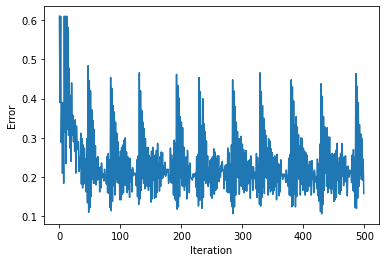

In [98]:
sns.lineplot(data = forplot, x = 'Iteration', y = 'Error')

In [100]:
# Error for testing data
y_hat = np.dot(data_test[['x0','x1','x2','x3','x4']],w.transpose())
data_test['y_hat'] = y_hat
data_test['y_hat'] = data_test['y_hat'].apply(lambda x:sign(x))

In [101]:
error_rate = len(data_test[data_test['y_hat'] != data_test['y']])/ len(data_test)
error_rate

0.296